Feature 1: This is a data set I created for a fictional Fruit and Veggie sales company. They want to know their top most profitable customers and their most profitable regions. Their data is spread out between three files. In the below code block the three files are read into Python, the excel file is reformated to .csv and they are merged into one master file. This file is called 'comp_data.csv' and is saved in the 'final_files' folder.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cu_data = pd.read_csv('final_files/cust_data.csv')
or_data = pd.read_csv('final_files/order_data.csv')
prd_data = pd.read_excel('final_files/prod_data.xlsx')

cust_order_data = pd.merge(cu_data, or_data, on='customer_id', how='outer')

comp_data = pd.merge(prd_data, cust_order_data, on='product_id', how='outer')

comp_data.to_csv('final_files/comp_data.csv', sep=',', index=False)


#Use the below code if you want to review the combine file. 

#comp_data_set = pd.read_csv('final_files/comp_data.csv')
#print(comp_data_set.to_string())



Feature 2: Prior to analyzng the data it needs to be cleaned. In the below code block unwanted columns are removed, cells with NaN values are updated, and data types are corrected so figures can be correctly calulated in the later analysis.

In [ ]:
col_drop = pd.read_csv('final_files/comp_data.csv')
col_drop1 = pd.DataFrame(col_drop)
col_drop2 = col_drop1.drop(['product_type', 'years_served'], axis=1, inplace=False)
col_org = col_drop2.sort_values(['order_date', 'order_id'], inplace=False)

col_nan = col_org.fillna({'product_id':'blank','product_name':'blank', 'unit_price':'0.00', 'unit_cost':'0.00', 'order_id':'blank', 'quantity':'0.0', 'order_date':'0/00/0000', 'order_status':'blank'}, inplace=False)

col_type = col_nan.astype({'unit_price':'float', 'unit_cost':'float', 'customer_id':'object', 'quantity':'float'})
print(col_type.to_string())

Feature 3: The customer wants to know the top 15 customers by the profit. The coding below creates a new column called 'Profits' based off of the Unit Price, Unit Cost, and Quantity sold. The sales are then grouped by each customer and the print show spreadsheet format top 15 customers and the graph shows the 15 top most profitable customers in bar chart.

In [ ]:
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['customer_id'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head(15)
top_cust = pd.merge(col_group, cu_data, on='customer_id', how='left')

plt.rcParams['figure.figsize'] = [10.5, 3.5]
plt.rcParams['figure.autolayout'] = True
plt.bar(top_cust['customer_name_first'], top_cust['profit'])

plt.title('Profits By Customer')
plt.xlabel('Customer')
plt.ylabel('Profits in Dollars')

plt.show
print(top_cust.to_string())


Feature 4: The customer would like to know the most profitable region of sales. The code below will generate that data and will also show a graphical display of the regions profits. As we can see the South West Region is the most profitable to date.

<function matplotlib.pyplot.show(close=None, block=None)>

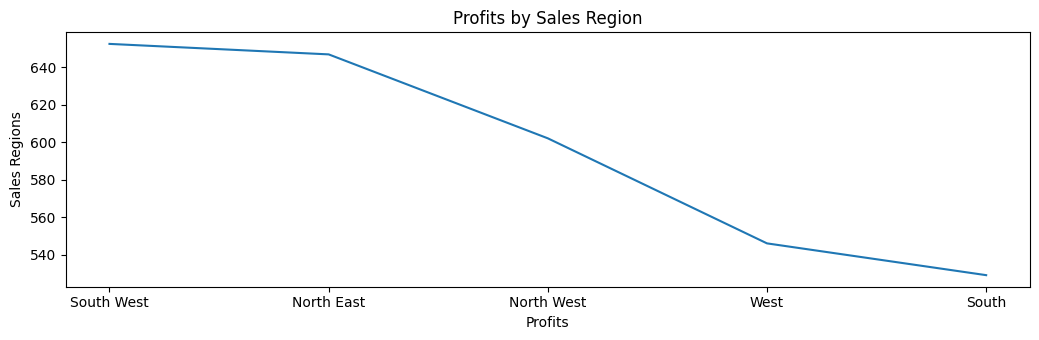

In [16]:
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['region'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head()

region_lab = col_group['region']
profit_tot = col_group['profit']
plt.plot(region_lab, profit_tot)

plt.title('Profits by Sales Region')
plt.xlabel('Profits')
plt.ylabel('Sales by Regions')

plt.show


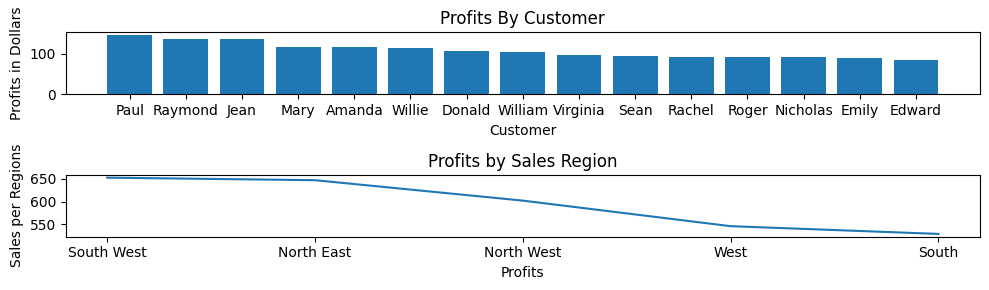

In [63]:
plot1 = plt.subplot2grid((2, 10), (0, 0), colspan=10)
plot1.set_title('Profits By Customer')
plot1.set_xlabel('Customer')
plot1.set_ylabel('Profits in Dollars')

plot2 = plt.subplot2grid((2, 10), (1, 0), colspan=10)
plot2.set_title('Profits by Sales Region')
plot2.set_xlabel('Profits')
plot2.set_ylabel('Sales per Regions')


plot1.bar(top_cust['customer_name_first'], top_cust['profit'])
plot2.plot(region_lab, profit_tot)

plt.tight_layout()
plt.show()
